## Import Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

## Load Dataset

In [ ]:
boston = pd.read_csv('housing.csv')

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston.shape

(506, 14)

In [ ]:
# from sklearn.datasets import load_boston
# boston_dataset = load_boston()
# boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
# boston['MEDV'] = boston_dataset.target
# # ketika gagal load data dari sklearn.datasets
# # boston = pd.read_csv('sample_data/housing.csv')
# boston.head()

## Data Preprocessing (20 point)

1. lakukan data preprocessing termasuk melakukan reduksi dimensi dan tidak melakukan reduksi dimensi untuk dibandingkan hasilnya bagus mana menggunakan PCA vs Non-PCA vs FA (optional)

In [ ]:
# Fitur yang digunakan dalam dataset house
feats = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Memisahkan fitur dan target dari dataset house
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
X_std[0:5]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ],
       [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682],
       [-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44105193, -1.02650148]])

### PCA Prosess (40)

1. lakukan data preprocessing termasuk melakukan reduksi dimensi dengan PCA (analisis berapa penggunaan PC yang tepat)

##### Gunakan PCA untuk mendapatkan Principle Components

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=13)
pca.fit(X_std)
pcs = pca.transform(X_std)

In [ ]:
pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13'])
pdf['species'] = y
pdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,species
0,-2.098297,0.773113,0.342943,-0.891774,-0.423070,0.315338,0.318641,-0.295832,-0.424937,-0.640206,0.033000,0.019440,0.365975,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,0.195876,-0.264223,0.553861,0.223670,-0.166962,-0.084236,0.640810,-0.125797,-0.070719,21.6
2,-2.074598,0.599639,0.167122,-0.739204,0.934534,-0.448095,0.484560,-0.105166,0.069775,0.180380,0.487557,0.133327,-0.014022,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,1.104956,-0.664649,0.622641,-0.255941,-0.342246,-0.045901,0.360209,0.508678,0.007847,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,1.065924,-0.617047,0.705086,0.134524,-0.417668,0.140880,0.395150,0.497732,0.014274,36.2


##### Skree Plot

In [ ]:
# cek varian tiap pc
print('Explained variance:', pca.explained_variance_)

Explained variance: [6.1389812  1.43611329 1.2450773  0.85927328 0.83646904 0.65870897
 0.5364162  0.39688167 0.27749173 0.22067394 0.18638271 0.16963823
 0.06363502]


In [ ]:
print('Explained variance ratio:', pca.explained_variance_ratio_*100)

Explained variance ratio: [47.12960636 11.02519325  9.55858979  6.5967316   6.42166105  5.05697827
  4.11812374  3.04690242  2.13033331  1.69413711  1.43087975  1.30233058
  0.48853277]


In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_*100)
cumsum

array([ 47.12960636,  58.1547996 ,  67.7133894 ,  74.310121  ,
        80.73178205,  85.78876032,  89.90688406,  92.95378648,
        95.08411979,  96.7782569 ,  98.20913665,  99.51146723,
       100.        ])

<BarContainer object of 13 artists>

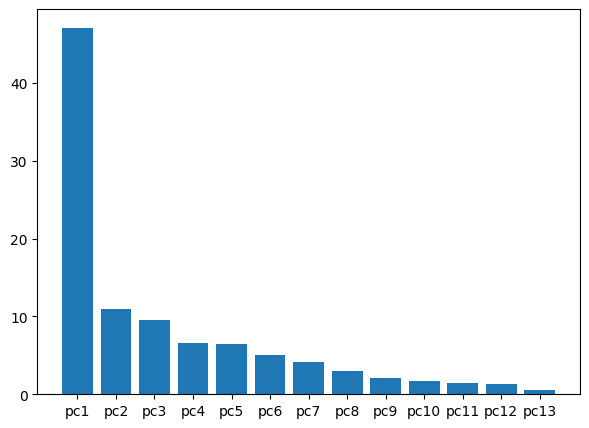

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
plt.bar(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13'], pca.explained_variance_ratio_ * 100)

##### Reduksi Feature

In [ ]:
pca = PCA(n_components=9)
pca.fit(X_std)
pcs = pca.transform(X_std)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9'])
X_std_pca['MEDV'] = y
X_std_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,MEDV
0,-2.098297,0.773113,0.342943,-0.891774,-0.423070,0.315338,0.318641,-0.295832,-0.424937,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,0.195876,-0.264223,0.553861,0.223670,-0.166962,21.6
2,-2.074598,0.599639,0.167122,-0.739204,0.934534,-0.448095,0.484560,-0.105166,0.069775,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,1.104956,-0.664649,0.622641,-0.255941,-0.342246,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,1.065924,-0.617047,0.705086,0.134524,-0.417668,36.2


## Regression Model (20 point)

bebas menggunakan model apapun

In [ ]:
# pca
X_pca = X_std_pca.drop('MEDV', axis=1)
y_pca = X_std_pca['MEDV']

X_train_pca, X_test_pca,Y_train_pca,Y_test_pca = train_test_split(X_pca,y_pca,
                                                test_size = 0.4,
                                                random_state = 42)
X_train_pca.shape

(303, 9)

In [ ]:
# non pca
X_train, X_test,Y_train,Y_test = train_test_split(X_std,y,
                                                test_size = 0.4,
                                                random_state = 42)
X_train.shape

(303, 13)

In [ ]:
# pca
model_pca = LinearRegression()
model_pca.fit(X_train_pca, Y_train_pca)

LinearRegression()

In [ ]:
# non pca
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# pca
y_pred_pca = model_pca.predict(X_test_pca)

In [ ]:
# non pca
y_pred = model.predict(X_test)

## Evaluasi (20)

Bandingkan dan jelaskan hasil menggunakan PCA dan tidak menggunakan PCA

In [ ]:
r2_pca = r2_score(Y_test_pca, y_pred_pca)
r2_pca

0.6639057167137297

In [ ]:
mae_pca = mean_absolute_error(Y_test_pca, y_pred_pca)
mae_pca

3.3954097639253384

In [ ]:
mse_pca = mean_squared_error(Y_test_pca, y_pred_pca)
mse_pca

25.524204328187928

In [ ]:
r2 = r2_score(Y_test, y_pred)
r2


0.7125140936111225

In [ ]:
mae = mean_absolute_error(Y_test, y_pred)
mae


3.297969683492414

In [ ]:
mse = mean_squared_error(Y_test, y_pred)
mse

21.832709989577417

In [ ]:
data_comparison = {
    'Metric': ['R²', 'MAE', 'MSE'],
    'Model with PCA': [r2_pca, mae_pca, mse_pca],
    'Model without PCA': [r2, mae, mse]
}

eval = pd.DataFrame(data_comparison)

eval

,Metric,Model with PCA,Model without PCA
0,R²,0.663906,0.712514
1,MAE,3.395410,3.297970
2,MSE,25.524204,21.832710


- R2: Model tanpa PCA memiliki R² yang lebih tinggi (0.7125) dibandingkan dengan model yang menggunakan PCA (0.6639). R² mengukur seberapa baik model dapat menjelaskan variansi dalam data target. Nilai R² yang lebih tinggi menunjukkan model yang lebih baik dalam hal penjelasan variansi, jadi model tanpa PCA lebih baik dalam hal ini.
- MAE: MAE mengukur rata-rata kesalahan absolut antara prediksi dan nilai sebenarnya. Semakin rendah MAE, semakin baik model dalam memprediksi. Meskipun perbedaannya kecil, model tanpa PCA sedikit lebih akurat dengan MAE yang lebih rendah (3.2979 dibandingkan dengan 3.3954).
- MSE: MSE mengukur rata-rata kuadrat perbedaan antara nilai prediksi dan nilai asli. Seperti MAE, semakin rendah MSE, semakin baik model. Model tanpa PCA lebih baik dalam hal ini dengan MSE yang lebih rendah (21.8327 dibandingkan dengan 25.5242).

Kesimpulannya: Model tanpa PCA lebih baik daripada model dengan PCA berdasarkan hasil evaluasi, karena memiliki R² yang lebih tinggi, MAE yang lebih rendah, dan MSE yang lebih rendahh. Model tanpa PCA lebih efektif dalam memprediksi target variabel.
